In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Generating the training data

(200, 2)
(200,)


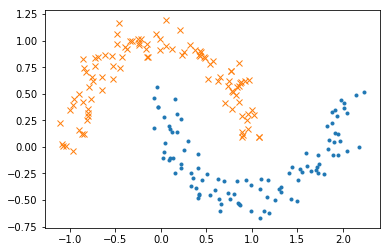

In [172]:
n = 200
# (x, y) = datasets.make_circles(n_samples=n, noise=0.1)
(x, y) = datasets.make_moons(n_samples=n, noise=0.1)
I = (y > 0)
J = np.logical_not(I)
print x.shape
print y.shape
plt.plot(x[I,0], x[I, 1], '.', x[J,0], x[J, 1], 'x');

# Building the Radical Basis Function Network

In [189]:
class NN(object):
    pass

r = NN()

# Number of radical basis to use
r.N = 10

r.x = tf.placeholder(tf.float32, (None, 2))
r.c = tf.Variable(tf.random_normal(shape=(N, 2)), dtype=tf.float32)
r.v = tf.Variable(tf.ones(shape=(N,1)))
r.W = tf.Variable(tf.random_normal(shape=(N, 1)))
r.b = tf.Variable(0, dtype=tf.float32)

pho = [None] * r.N
for i in range(r.N):
    d = tf.norm(r.x - r.c[i,:], axis=1)
    pho[i] = tf.exp(-d * d / 2 / r.v[i])
r.rho = tf.transpose(tf.stack(pho))
r.y = tf.matmul(r.rho, r.W) + r.b
r.ref = tf.placeholder(tf.float32, (None, 1))

In [192]:
r.err = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=r.ref, logits=r.y))

# Training

In [195]:
batch_size = 100
epochs = 100
rate = 0.01

def batch():
    index = np.random.choice(n, batch_size)
    x_train = x[index]
    y_train = y[index].reshape(batch_size, 1)
    return {r.x: x_train, r.ref: y_train}

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(r.err)

s = tf.Session()
s.run(tf.global_variables_initializer())
s.run(r.err, batch())

66.603683

In [198]:
for ep in range(epochs):
    err, _ = s.run((r.err, optimizer), feed_dict=batch())
    if ep % (epochs // 10) == 0:
        print "[%d] %.3f" % (ep, err)
print "Done: %.3f" % err

[0] 72.476
[10] 29.786
[20] 35.416
[30] 28.579
[40] 23.640
[50] 25.134
[60] 17.643
[70] 17.658
[80] 14.817
[90] 9.267
Done: 8.660


# Plot the decision boundary

In [203]:
x0 = np.linspace(np.min(x[:,0]), np.max(x[:, 0]), 100)
x1 = np.linspace(np.min(x[:,1]), np.max(x[:, 1]), 100)
xx, yy = np.meshgrid(x0, x1)
xy = np.asarray([xx.reshape(-1), yy.reshape(-1)]).T
z = s.run(r.y, feed_dict={r.x: xy})
z = z.reshape(100, 100)

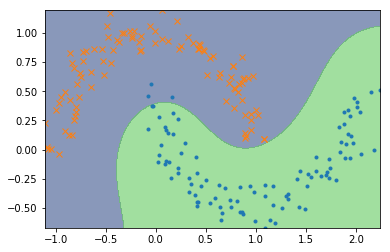

In [211]:
plt.contourf(xx, yy, z, levels=[np.min(z), 0.5, np.max(z)], alpha=0.6);
plt.plot(x[I,0], x[I, 1], '.', x[J,0], x[J, 1], 'x');